# Notebook 7: Logistic Regression and SoftMax for MNIST

## Learning Goal

The goal of this notebook is to familiarize the reader with SoftMax regression (a generalization of logistic regression to more than two categories), categorical predictions, and the MNIST handwritten dataset. The reader will understand how to use the Scikit Logistic regression package and visualize learned weights.

## Overview
### The MNIST dataset:
The MNIST classification problem is one of the classical ML problems for learning classification on high-dimensional data with a fairly sizable number of examples (60000). Yann LeCun and collaborators collected and processed $70000$ handwritten digits (60000 are used for training and 10000 for testing) to produce what became known as one of the most widely used datasets in ML: the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Each handwritten digit comes in a grayscale square image in the shape of a $28\times 28$ pixel grid. Every pixel takes a value in the range $[0,255]$, representing $256$ nuances of the gray color. The problem of image classification finds applications in a wide range of fields and is important for numerous industry applications of ML. 
### SoftMax regression:
We will use SoftMax regression, which can be thought of as a statistical model which assigns a probability that a given input image corresponds to any of the 10 handwritten digits. The model is a generalization of the logistic regression and reads:
\begin{align}
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T\boldsymbol{x}}},
\end{align}
Where $p(y=i|\boldsymbol{x};W)$ is the probability that input $\boldsymbol{x}$ is the $i$-th digit, $i\in[0,9]$.
The model also has 10 weight vectors $\boldsymbol{w}_i$ which we will train below. Finally, one can use this information for prediction by taking the value of $y$ for which this probability is maximized:
\begin{align}
y_{pred}=\arg\max_i p(y=i|\boldsymbol{x})
\end{align}

## Numerical Experiments

The reader is invited to check out the code below to build up their intuition about SoftMax regression. The following notebook is a slight modification of [this Scikit tutorial](http://scikit-learn.org/dev/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html) by Arthur Mensch on studying the MNIST problem using Logistic Regression.

In [43]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Automatically created module for IPython interactive environment
Example run in 27.228 s
Sparsity with L2 penalty: 9.18%
Test score with L2 penalty: 0.8883


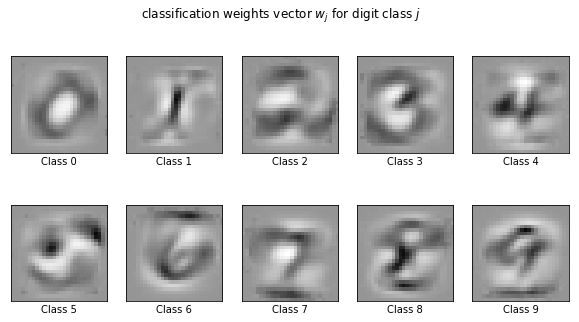

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

### Exercises: ###  
<ul>
<li> The snippet above invoked the "sag" solver which only deals with $L2$ regularization. Try another solver, e.g. 'liblinear', in scikit that supports $L1$ regularization. You can find more details on <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.</a>
<li> Visualize the misclassified samples. Analyze on how logistic regression performs on MNIST, and note this since we will study the MNIST problem later on using deep neural nets.

<li> Try to vary the size of the training set and see how that affects the accuracy.
<li>  [Theory] In this notebook, we considered a $K=10$ multi-class logistic regression (MLR) also known as the SoftMax regression. Recall that the our model reads:
$$
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}}
$$
Use this to construct the likelihood function $P(y|\boldsymbol{x})$.

<li> [Theory] Now consider we're given a set of i.i.d. data $\mathcal{D}=\{(\boldsymbol{x}_1,y_1),\dots, (\boldsymbol{x}_n,y_n)\}$. As we argued in the main text, the cross-entropy error used in logistic regression is motivated by maximizing the likelihood (or equivalently, minimizing the negative log-likelihood), find the corresponding error function $E(\boldsymbol{w}_0,\cdots,\boldsymbol{w}_9)$ in MLR using the hypothesis above. 

<li> [Theory] Using the error function derived above, calculate its gradient $\frac{\partial E}{\partial \boldsymbol{w}_k}$. Can you find an elegant way of writing the gradient?
</ul>


#### Ex 1 Another Solver
To see the performance of different solvers, we runs the following 3 trials. Since 'liblinear' does not support the multiclass problems, we tried some other solvers.

In the first trial, we use the $L_1$-norm and 'saga' solver. It can be observed that it does not have a significant improvement in the performance. Actually they have very similar performance where the other conditions are fixed.

In the second, we use the $L_2$-norm and solver 'lbfgs'. It does not converge.

In the third case, we use the elastic net regularization and 'saga' solver, and get a lower Test score than $L_1$ with 'saga' case.

In [23]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Automatically created module for IPython interactive environment
Example run in 35.950 s
Sparsity with L1 penalty: 9.57%
Test score with L1 penalty: 0.8953


In [5]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='lbfgs', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty and 'lbfgs' solver: %.4f" % score)

Automatically created module for IPython interactive environment
Example run in 29.554 s
Sparsity with L2 penalty: 9.31%
Test score with L2 penalty and 'lbfgs' solver: 0.9152


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [8]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='elasticnet', l1_ratio=0.5, solver='saga', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with Elastic Net penalty: %.2f%%" % sparsity)
print("Test score with Elastic Net penalty: %.4f" % score)

Automatically created module for IPython interactive environment
Example run in 33.538 s
Sparsity with Elastic Net penalty: 8.42%
Test score with Elastic Net penalty: 0.8833


#### Ex 2 Visualize
We visulized the first three misclassified examples below. It can be observed that even some examples have a clear pattern ,e.g. the second misclassfied figure below, Logistic regression still may fail to classify it.

In [52]:
misclassified = np.where(y_test != clf.predict(X_test))

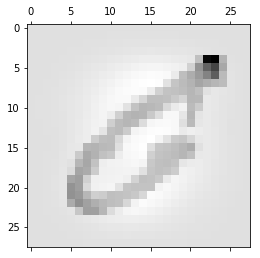

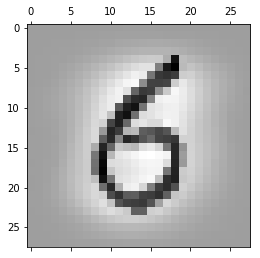

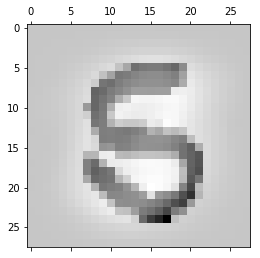

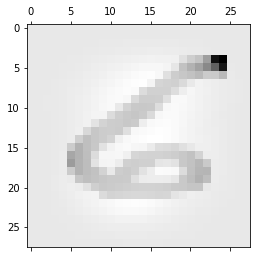

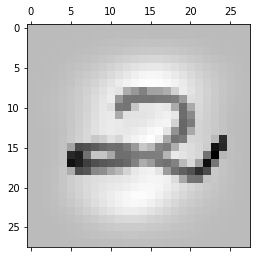

In [53]:
plt.matshow(X_test[misclassified[0][0],:].reshape(28,28),cmap='binary')
plt.matshow(X_test[misclassified[0][1],:].reshape(28,28),cmap='binary')
plt.matshow(X_test[misclassified[0][2],:].reshape(28,28),cmap='binary')
plt.matshow(X_test[misclassified[0][3],:].reshape(28,28),cmap='binary')
plt.matshow(X_test[misclassified[0][4],:].reshape(28,28),cmap='binary')
plt.show()

#### Ex 3 Relation between Size and Accuracy
Let $S$ denote the size of training dataset and $A$ denote the test score which reveals the accuracy of the classification.
By vary the value of $S$, we have:
\begin{align}
&S=50&A=0.5662\\
&S=100&A=0.6890\\
&S=500&A=0.8210\\
&S=1000&A=0.8599\\
&S=5000&A=0.8869\\
&S=10000&A=0.8892\\
&S=50000&A=0.8939\\
\end{align}
From these experiments, we can see that:

First, if the size data set is small, i.e., comparaple with the number of classes, (i.e., 50~100 in the given context), then an increase in the size of training data would siginificantly improve the accuracy of classification.

Second, if the traing set is large enough such that we can expect that it covers a reasonable amount of cases in each class (i.e., $\ge1000$ in the context), then an increase of the size of training set only marginally improve the accuracy.

So far, we see a positive correlation between the size of training set and the classification accuracy. And due to the marginal incease, we can expect that the improvement in accuracy would asymptotically approaching a constant strictly less than 1 (e.g., 0.9 is a possible candidate in this case).

#### Ex 4 Likelihood function
Let the data set to be $\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}$ for $y_n\in\{0,\dots,9\}$.

The likelihood function of Softmax is given by:
\begin{align}
L(W|Data)=& P(Data|W)\\
=&\prod_n P_W(y_n|x_n)\\
=&\prod_n \frac{e^{\boldsymbol{w}_{y_n}^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}}
\end{align}

#### Ex 5 Error function
We may still use the negative log-likelifood as the error function $E(W)$, which is given by:
\begin{align}
E=&-\log L(W|Data)\\
=&-\log(\prod_n \frac{e^{\boldsymbol{w}_{y_n}^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}})\\
=& -\sum_n \log p(y_n)
\end{align}

#### Ex 6 Gradient of Error function
The gradient of error function $\nabla E$ could be write in its component:
\begin{align}
\frac{\partial E}{\partial \boldsymbol{w}_k^T\boldsymbol{x}}=&\frac{\partial E}{\partial p_k}\frac{\partial p_k}{\partial \boldsymbol{w}_k^T\boldsymbol{x}}\\
=&
(-N_k \frac{1}{p_k})
(
\frac{
(\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}})
\frac{\partial}{\partial \boldsymbol{w}_k^T\boldsymbol{x}} e^{\boldsymbol{w}_k^T\boldsymbol{x}}
-e^{\boldsymbol{w}_k^T\boldsymbol{x}}\frac{\partial}{\partial \boldsymbol{w}_k^T\boldsymbol{x}}(\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}})
}
{(\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}})^2}
)\\
=&
-N_k \frac{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}}{e^{\boldsymbol{w}_j^T \boldsymbol{x}}}
\frac{
(\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}})
e^{\boldsymbol{w}_k^T\boldsymbol{x}}
-(e^{\boldsymbol{w}_k^T\boldsymbol{x}})^2
}
{(\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}})^2}\\
=&
-N_k
\frac{
(\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}})
-e^{\boldsymbol{w}_k^T\boldsymbol{x}}
}
{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}}\\
=&
-N_k
(1-\frac{e^{\boldsymbol{w}_k^T\boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}})\\
=&
N_k (p_k-1)
\end{align}
where $N_k$ denote the number of occasions s.t. $y_n=k$ in the given data set.